In [ ]:
"""
Arian Nadjimzadah
Spectral Clustering Algorithm and the Stochastic Block Model
Corresponding to sections 4.5.1 and 4.5.4
"""

In [501]:
"""
The Stochastic Block Model (slightly generalized):
Divide n + m vertices into sets of n and m
Construct a random graph G by connecting every pair of vertices independently with probability p
if they belong to the same community and probability q if they belong to different communities.

This is represented by an adjacency matrix.
"""
import random
import numpy as np

def G_BlockModel(n, m, p, q):
    # 0,...,n-1 in group 1 and n,...,n+m-1 in group 2
    N = n + m
    A = np.zeros((N, N))
    #A = [[0 for i in range(N)] for j in range(N)]
    for i in range(N):
        # No self-edges
        for j in range(i+1,N):
            # case of different communities
            if (i < n and j >= n):
                A[i,j] = (1 if random.random() <= q else 0)
                A[j,i] = A[i,j]
            # case of same communities
            else:
                A[i,j] = (1 if random.random() <= p else 0)
                A[j,i] = A[i,j]
    return A

n = 100
m = 100
N = n + m
A = G_BlockModel(n,m,0.9,0.3)


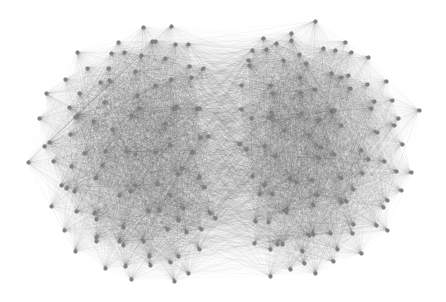

In [502]:

"""
Converting the adjacency matrix to a form readable by networkx and plotting the result
"""
import networkx as nx
def adjMatrix2plottable(A):
    # get size of graph
    size = np.shape(A)[0]
    # create nx Graph object
    G = nx.Graph()
    # add all the nodes
    for i in range(size):
        G.add_node(i)
    # add all the edges
    for i in range(size):
        for j in range(i+1, size):
            if (A[i][j] == 1):
                G.add_edge(i,j)
    return G
    
G = adjMatrix2plottable(A)
nx.draw(G, pos=nx.spring_layout(G), node_size = 10, width = 0.01, node_color = "gray")  # use least energy embedding

In [499]:
"""
Now we want to recover our original partition.
General method to group similar data.
Spectral Clustering Algorithm (This does not work for some reason...)
"""
from numpy import linalg as la
import numpy as np
import scipy
def spectral_clustering(A):
    A = scipy.sparse.csr_matrix(A)
    # get the eigenvalues + eigenvectors
    w, v = scipy.linalg.eig(A.toarray())
    # index of second largest eigenvector
    k = np.argsort(w)[-2]
    # second largest eigenvector
    v2 = v[:, k].flatten()
    
    # partition the vertices into communities based on sign of coefficient of v2
    P = [(1 if v2[j] > 0 else 0) for j in range(len(v2))]
    return P

P = spectral_clustering(A)

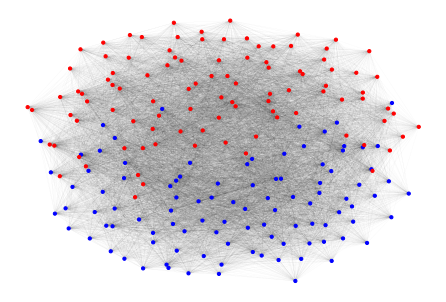

In [500]:
"""
Color the vertices based on spectral clustering algorithm and plot
"""
# X,Y = spectral_clustering(A)
color_map = [("blue" if i==1 else "red") for i in P]
    
nx.draw(G, pos=nx.spring_layout(G), node_size = 10, width = 0.01, node_color = color_map)  # use least energy embedding

# Giving the number of differences
diffs = 0
# desired array
actual1 = []
actual2 = []
for i in range(n):
    actual1.append(0)
    actual2.append(1)
for i in range(m):
    actual1.append(1)
    actual2.append(0)


# this array


In [152]:
"""
Question: (Easy) How can you generalize the Stochastic Block Model to produce any number of communities?
Question: (Harder) How can you generalize this algorithm to any number of communities?
"""

'\nQuestion: (Hard) How can you generalize this algorithm to any number of communities?\nQuestion: (Easy) How can you generalize the Stochastic Block Model to produce any number of communities?\n'

Copyright (c) 2020 TRIPODS/GradStemForAll 2020 Team